<a href="https://colab.research.google.com/github/Saket-Kumar-Singh/Bank_Loan_With_Backend/blob/master/Home_Loan_Django_Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

<h2>Getting and Cleaning Data</h2>

In [2]:
df = pd.read_csv('bankloan.csv')
df= df.dropna()
df = df.drop("Loan_ID", axis = 1)
df["LoanAmount"] = (df["LoanAmount"]*1000).astype(int)
Counter(df['Loan_Status']) # Since there is a disbalance in number of Y and N we will use SMOT to extend the number of N this will help in increasing accuracy

Counter({'N': 148, 'Y': 332})

In [3]:
pre_y = df["Loan_Status"]
pre_x = df.drop("Loan_Status", axis = 1)
dm_x = pd.get_dummies(pre_x)
dm_y = pre_y.map(dict(Y= 1, N = 0))

<h2> Preprocessing</h2>

In [4]:
# No we will try to do one Hot encoding
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_x, dm_y)
Sc = MinMaxScaler()
X = Sc.fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, shuffle = True)

<h2>Model Making</h2>

In [5]:
classifier = Sequential()
classifier.add(keras.Input(shape = (X.shape[1], )))
classifier.add(Dense(200, activation = "relu", kernel_initializer = "random_normal"))
classifier.add(Dense(400, activation = "relu", kernel_initializer = "random_normal"))
classifier.add(Dense(4, activation = "relu", kernel_initializer = "random_normal"))
classifier.add(Dense(1, activation = "sigmoid", kernel_initializer = "random_normal"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
classifier.fit(X_train, y_train, batch_size = 20, epochs = 20, verbose = 0)
eval_model = classifier.evaluate(X_test, y_test)
eval_model

5/5 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.8346


[0.4291083812713623, 0.8345864415168762]

In [6]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


In [7]:
# !git add .
# !git config --global user.name "Saket-Kumar-Singh"
# !git config --global user.email "saketkrsingh37772@gmail.com"
# !git commit -m "Made Classification Model(#1)"
# !git remote remove origin
# !git remote add origin "https:/Saket-Kumar-Singh:saket20/08@github.com/Saket-Kumar-Singh/Ban_Loan_With_Backend.git"
# !git push origin master

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

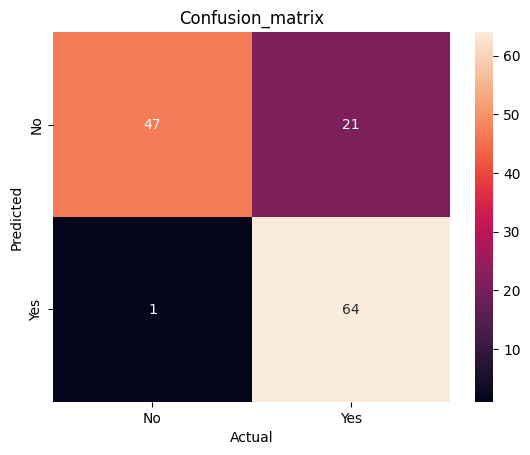

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel("Actual");
ax.set_ylabel("Predicted");
ax.set_title("Confusion_matrix");
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [9]:
import pickle
filename = "loan_model.pkl"
with open("loan_model.pkl", "wb") as fle:
  pickle.dump(classifier, fle)